In [116]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

credit_df = pd.read_csv("credit_card.csv")
credit_card_labels = pd.read_csv('credit_card_label.csv')
credit_df = pd.merge(credit_df, credit_card_labels, on="Ind_ID")

# 1. Cleaning Up Data

In [117]:
def standardize():
    credit_df['GENDER'] = credit_df['GENDER'].map({'M':0, 'F':1})
    credit_df['Car_Owner'] = credit_df['Car_Owner'].map({'Y':1, 'N':0})
    credit_df['Propert_Owner'] = credit_df['Propert_Owner'].map({'Y':1, 'N':0})
    credit_df['Type_Income'] = credit_df['Type_Income'].map({'Working':1, 'Commercial associate':2,
                                                         'Pensioner':3, 'State servant':4})
    credit_df['EDUCATION'] = credit_df['EDUCATION'].map({'Academic degree':1,'Incomplete higher':2,
                                                     'Lower secondary':3,'Secondary / secondary special':4,
                                                     'Higher education':5})
    credit_df['Marital_status'] = credit_df['Marital_status'].map({'Married':1, 'Single / not married':2,
                                                               'Civil marriage':3,'Separated':4,
                                                               'Widow':5})
    credit_df['Housing_type'] = credit_df['Housing_type'].map({'House / apartment':1, 'With parents':2,
                                                           'Rented apartment':3,'Municipal apartment':4,
                                                           'Co-op apartment':5,'Office apartment':6})
    credit_df['Type_Occupation'] = credit_df['Type_Occupation'].map({'Core staff':1,'Cooking staff':2,
                                                                'Laborers':3,'Sales staff':4,'Accountants':5,
                                                                 'High skill tech staff':6,'Managers':7,
                                                                'Cleaning staff':8,'Drivers':9,
                                                                'Low-skill laborers':10,'IT staff':11,
                                                                'Waiters/barmen staff':12,'Security staff':13,
                                                                'Medicine staff':14,'Private service staff':15,
                                                                'HR staff':16,'Secretaries':17,'Realty agents':18})
    credit_df['Type_Occupation'] = credit_df['Type_Occupation'].fillna(credit_df['Type_Occupation'].mean())
    
    credit_df['GENDER'] = credit_df['GENDER'].fillna(credit_df['GENDER'].mean())
    
    credit_df['Birthday_count'] = credit_df['Birthday_count'].div(-365)
    credit_df['Birthday_count'] = credit_df['Birthday_count'].round(2)
    credit_df['Birthday_count'] = credit_df['Birthday_count'].fillna(credit_df['Birthday_count'].mean())

    credit_df['Employed_days'] = credit_df['Employed_days'].replace(365243,0)
    credit_df['Employed_days'] = credit_df['Employed_days']*(-1)

    credit_df['Annual_income'] = credit_df['Annual_income'].fillna(credit_df['Annual_income'].mean())
    # 0 means unemployed
    # credit_df['Birthday_count'].fillna(0)

When making improvements to the cleaning of the dataframe, I swapped the NaN values in type_occupation, gender, and birthday count for their means

In [118]:
standardize()


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
def train_test_split():
    X = credit_df.drop('label', axis = 1)
    y = credit_df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.3, random_state = 13, stratify=y)

Regression Score: 0.6096774193548387


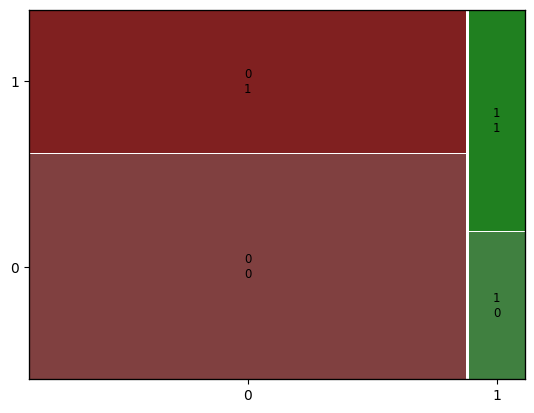

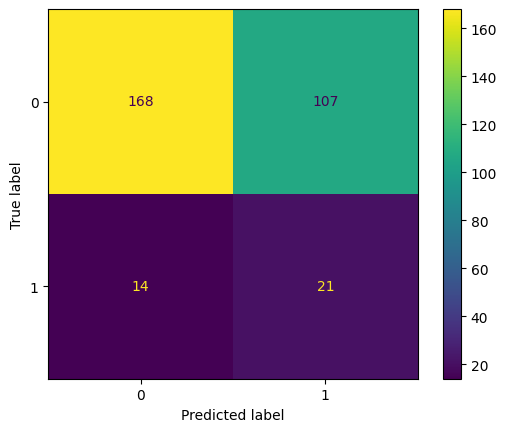

In [120]:
def logistical_regression(linreg_df: str, linreg_column: str, mosaic_y_or_n:str, matrix_y_or_n:str) -> str:    
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    from statsmodels.graphics.mosaicplot import mosaic
    from sklearn.metrics import ConfusionMatrixDisplay

    X = linreg_df.drop(linreg_column, axis=1)
    y = linreg_df[linreg_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
    random_state=13, stratify=y)
    
    sc = StandardScaler()
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    
    regression = LogisticRegression(random_state=13, class_weight='balanced').fit(X_train, y_train)
    y_predicted = regression.predict(X_test)
    print('Regression Score:', regression.score(X_test, y_test))
    if mosaic_y_or_n == 'y':
        conf_matrix = confusion_matrix(y_test, y_predicted)
        mosaic(conf_matrix)
    if matrix_y_or_n == 'y':
        ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)
logistical_regression(credit_df, 'label', 'y', 'y')

def precision_and_recall(calc_type: str, tp: int, tn: int,
                                fp: int, fn: int) -> float:
    if calc_type == "precision":
        value = tp / (tp + fp)
        return value
    elif calc_type == "recall":
        value = tp / (tp + fn)
        return value
    elif calc_type == "accuracy":
        value = (tp + tn) / (tp+tn+fp+fn)
        return value



I get a really poorly performing dataframe with a lot of false positives.

In [121]:
# the recall is poor
precision_and_recall('recall',21,168,107,14)

0.6

Highest Score: 0.8924731182795699
KNN Value Used: 2


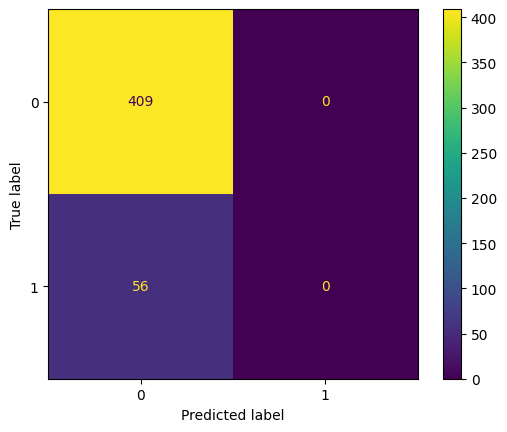

In [122]:
def knn_test_all(target_df: str, target_column: str, knn_max_val: int) -> str:
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    credit_df.columns = credit_df.columns.astype(str)
    X = target_df.drop(target_column, axis=1)
    y = target_df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)

    # looks for max
    knn_list = []
    knn_val = 1
    while knn_val <= knn_max_val:
        knn = KNeighborsClassifier(n_neighbors=knn_val)
        knn.fit(X_train, y_train)
        knn_list.append(knn.score(X_test, y_test))
        knn_val = knn_val + 1
    # print(knn_list)
    knn_max = (max(knn_list))
    knn_val_in_list = (knn_list.index(knn_max))
    print('Highest Score:', knn_max)
    print('KNN Value Used:', knn_val_in_list + 1)
    y_pred = knn.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
    
knn_test_all(credit_df, 'label', 30)




With my KNN it's now just negatives and false negatives. I used my function from assignment 6 where it found the best knn value and used it.


# Combined

In [123]:
# from imblearn.combine import SMOTEENN
# combine = SMOTEENN(random_state=13)

# X_resampled, y_resampled = combine.fit_resample(X_train, y_train)

# model = LogisticRegression(random_state = 13)
# model.fit(X_resampled, y_resampled)

In [124]:
# y_pred = model.predict(X_test)
# ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [125]:


precision_and_recall('precision',41,182,229,12)


0.15185185185185185

In [126]:
precision_and_recall('recall',41,182,229,12)

0.7735849056603774

# Oversampler

In [127]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=13)

# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [128]:
# model = LogisticRegression(random_state=42)
# model.fit(X_resampled, y_resampled)

In [129]:
# y_pred = model.predict(X_test)

# ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [130]:
precision_and_recall('recall',32,245,167,21)

0.6037735849056604

In [131]:
precision_and_recall('precision',32,245,167,21)

0.16080402010050251

# 2. Undersampler

In [132]:
from imblearn.under_sampling import ClusterCentroids
def perform_undersampling():
    rus = ClusterCentroids(random_state=13)
    X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
    model = LogisticRegression(random_state = 13)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

c:\Users\cjcra\Documents\csci_1070_course\virtualenvtest\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


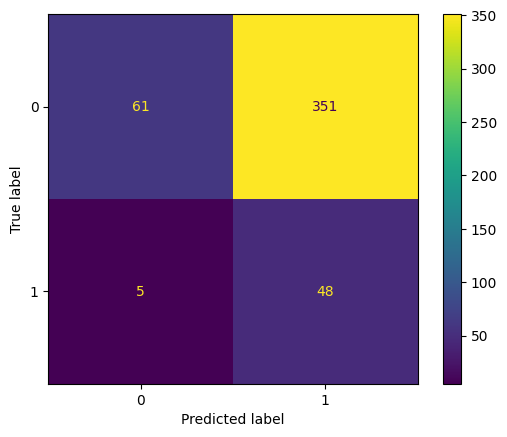

In [133]:
# y_pred = model.predict(X_test)
# ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
perform_undersampling()

In [134]:
precision_and_recall('recall',48,61,351,5)
# Oversampling and undersampling both have their drawbacks, with this one having a very high recall but also having a lot of false positives

0.9056603773584906

In [135]:
precision_and_recall('precision',48,61,351,5)

0.12030075187969924

In [136]:
def knn_test_all(knn_max_val):
    knn_list = []
    knn_val = 1
    while knn_val <= knn_max_val:
        knn = KNeighborsClassifier(n_neighbors=knn_val)
        knn.fit(X_train, y_train)
        knn_list.append(knn.score(X_test, y_test))
        knn_val = knn_val + 1
    # print(knn_list)
    knn_max = (max(knn_list))
    knn_val_in_list = (knn_list.index(knn_max))
    print('Highest Score:', knn_max)
    print('KNN Value Used:', knn_val_in_list + 1)
    y_pred = knn.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

Highest Score: 0.886021505376344
KNN Value Used: 4


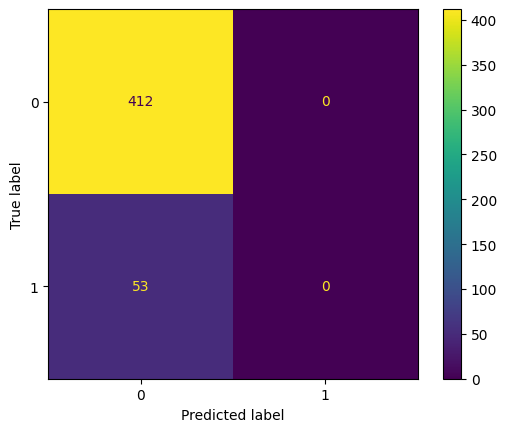

In [137]:
knn_test_all(30)

I went with recall to help me determine the best way to sample this data, because the precision in all of these is horrible.
I'm choosing the dataset model that used undersampling

The KNN for undersampling also performed poorly similarly to how it performed normally.

# 3. ROC Curve

In [138]:
from sklearn import metrics
def roc_curve():
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    aucmetric = metrics.auc(fpr,tpr)
    print("Calculated AUC: ", aucmetric)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
    display.plot()

Calculated AUC:  0.4717897050741894


c:\Users\cjcra\Documents\csci_1070_course\virtualenvtest\lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


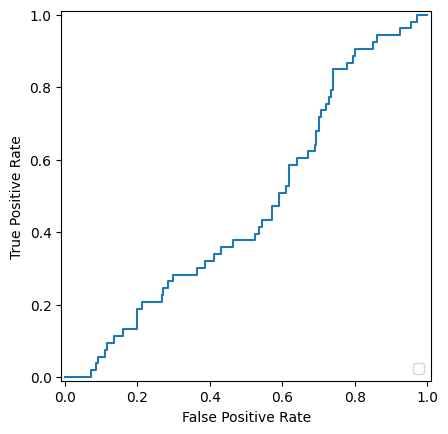

In [139]:
roc_curve()

This shows the true positive and false positive rate is pretty even up until the end.

# 4. SVM

In [140]:
from sklearn import svm
from sklearn.svm import SVC
def svm():
    classifier = SVC(kernel = 'linear')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
    


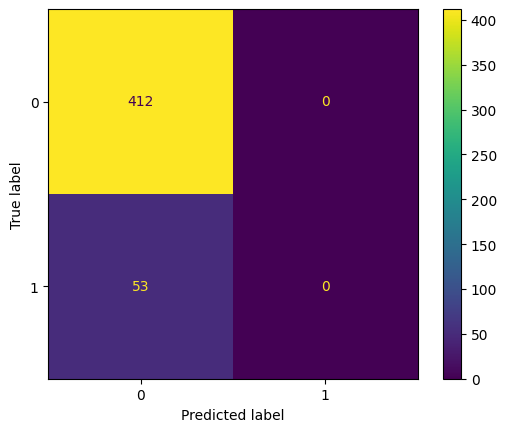

In [141]:
svm()

In [142]:
precision_and_recall('recall',0,412,0,53)

0.0

The SVM didn't predict well at all, with it only displaying true and false negatives.

# 5. Outlier Detection

Outlier detection is where finding pieces of your data that is significantly off from the majority of your data. Outlier detection is so important because outliers can hurt your analysis. These outliers could be normal and actually happened, or they could be instances of the data being put in wrong. If it's the latter, it's important to detect and remove the outlier, and if it's the former, then it should probably stay. When it's real data, it can help to show the "big picture" of the data.
    
There are many different ways to use outlier detection. One easy way is to you box plots, where you can easily see dots where they're far off from the rest of the data. Another way is using "isolation forest" which is a method you can import from sklearn. What it does is 